In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

In [34]:
len(X_test)

10000

In [35]:
X_train[0].shape

(28, 28)

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

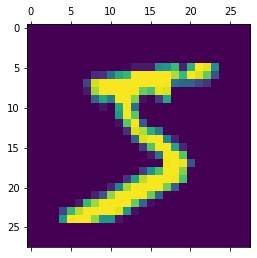

In [37]:
plt.matshow(X_train[0])

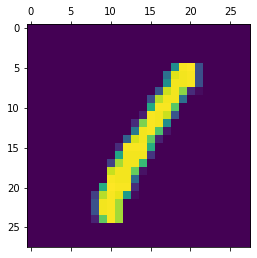

In [38]:
plt.matshow(X_train[3])

In [39]:
y_train[3]

1

In [40]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [41]:
X_train.shape
#3 dimensions: 1- length of dataset,shape of each data

(60000, 28, 28)

In [42]:
#converting 2 d array to 1-d
#also perform scaling

X_train = X_train/255
X_test = X_test/255

X_train_flat = X_train.reshape(len(X_train),28*28)
X_train_flat.shape


(60000, 784)

In [43]:
X_test_flat = X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

## Creating Simple Neural Network with 2 layers(input and output)

In [44]:
#Sequential means having a stack of layer in neural network
#since it is stack it will accept every layer as one element
#Dense means all neurons in one layer are connected with every other neuron in other layer
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

#Optimiser helps in efficient training during backward propagation

#sparse means basically we have an exact no in output and categorical means we have our output classified into categories

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

#epochs are no of times our training will be done
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 961us/step - loss: 0.4722 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.3047 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.2836 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9255


In [45]:
#checking accuracy on test dataset

model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 904us/step - loss: 0.2642 - accuracy: 0.9265


[0.2642172574996948, 0.9265000224113464]

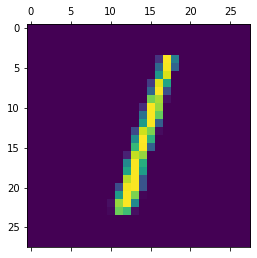

In [46]:
plt.matshow(X_test[2])

In [47]:
y_predicted = model.predict(X_test_flat)

In [48]:
y_predicted[2]
#predicting for all digits from 0 to 9

array([3.0663610e-04, 9.9334562e-01, 7.3856401e-01, 3.4310591e-01,
       2.5123239e-02, 1.3726261e-01, 1.5352356e-01, 1.3481671e-01,
       4.2723405e-01, 5.5582911e-02], dtype=float32)

In [49]:
#to get maximum value of this array or its index
np.argmax(y_predicted[2])

1

In [50]:
#y_predicted is floating no array we have to convert them to single whole no to make any comparison

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [52]:
y_predicted_labels[ : 5]

[7, 2, 1, 0, 4]

In [53]:
y_test[ : 5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [54]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

Text(69.0, 0.5, 'Truth')

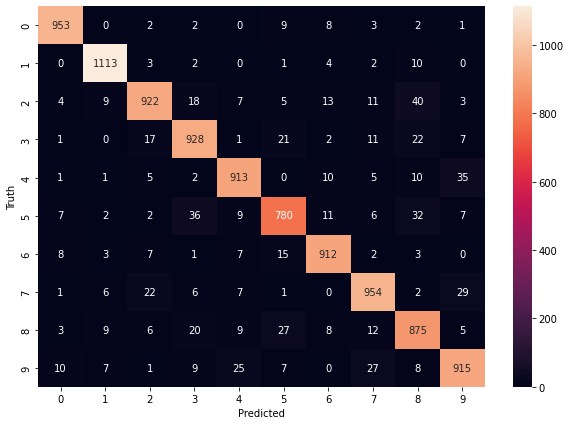

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now adding inner neural layers

In [56]:
model = keras.Sequential([
    #adding one more layers with 100 neurons(Trial and error)
    #Increase will layers will increase both time and accuracy
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

#epochs are no of times our training will be done
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2777 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1300 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0699 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0540 - accuracy: 0.9830


In [57]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 824us/step - loss: 0.0757 - accuracy: 0.9769


[0.07573807239532471, 0.9768999814987183]

Text(69.0, 0.5, 'Truth')

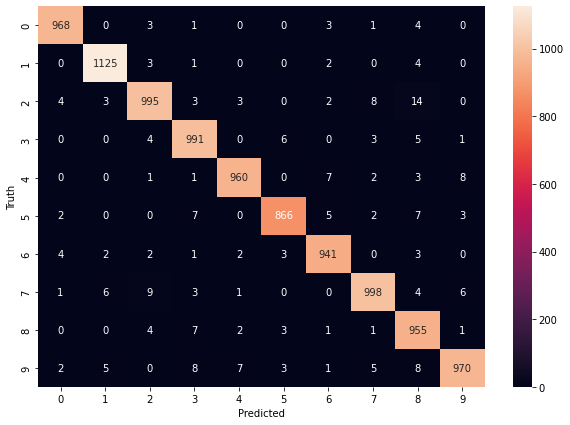

In [58]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Without using X_test_flat

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir="logs/",
    histogram_frequency  = 1
)

model.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

model.fit(X_train,y_train,epochs=5, callbacks = tb_callback)

ValueError: Unrecognized arguments in `TensorBoard` Callback: {'histogram_frequency'}. Supported kwargs are: {'embeddings_data', 'embeddings_layer_names', 'batch_size', 'write_grads'}